In [1]:
# %matplotlib notebook
%matplotlib inline

# %connect_info
import flow.misc
text = """
Jupyter connect hash:
{word}

To connect to current notebook:
    $> jupyter console --existing {filename}
    
"""
print(text.format(word=flow.misc.notebook_word(), filename=flow.misc.notebook_file(flow.misc.notebook_word())))
print("Last run: {}".format(flow.misc.timestamp()))


Jupyter connect hash:
certified

To connect to current notebook:
    $> jupyter console --existing kernel-afdfc1ed-6c9d-4ed0-bfab-2b37d2aa5cd3.json
    

Last run: 2018-10-25-10h38m53s


/usr/local/lib/python2.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.23) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context='notebook', style='darkgrid')
# sns.set(context='talk', style='darkgrid')

import jzap
import flow
import pool

In [80]:
date = flow.metadata.Date('OA205', 180926)
date

Date(mouse=OA205, date=180926, tags=(u'jeff',), photometry=())

## Not normalized at all

In [84]:
start_s = -1
end_s = 2
rew_responses = []
for run in date.runs():
    rew_responses.append(run.trace2p().cstraces(
        'reward', trace_type='dff', baseline=None, start_s=start_s,
        end_s=end_s))
framerate = run.trace2p().framerate
all_rew = np.concatenate(rew_responses, 2)
rew = all_rew.mean(2)
order = np.argsort(rew[:, int(start_s * -1 * framerate):].mean(1))
all_rew.shape

(127, 46, 73)

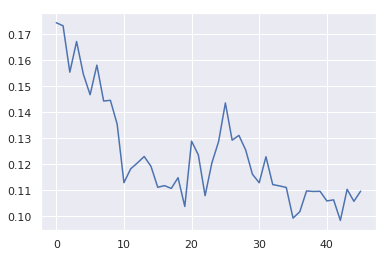

In [85]:
plt.plot(rew[0])

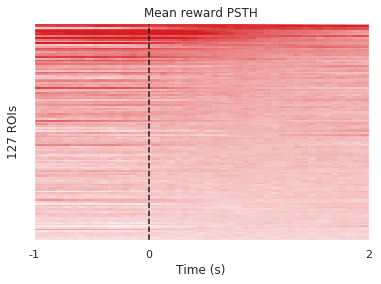

In [90]:
fig, ax = plt.subplots()
pool.plotting.graphfns.axheatmap(fig, ax, rew[order], [], 'dff', 0.3)
ax.axvline(framerate * start_s * -1, linestyle='--', color='k')
ax.set_xticks([0, framerate * start_s * -1, rew.shape[1]-1])
ax.set_xticklabels([start_s, 0, end_s])
ax.set_xlabel('Time (s)')

ax.set_yticklabels([])
ax.set_ylabel(str(rew.shape[0]) + ' ROIs')

ax.set_title('Mean reward PSTH');

In [94]:
start_s = -1
end_s = 2
rew_responses = []
for run in date.runs():
    rew_responses.append(run.trace2p().cstraces(
        'reward', trace_type='dff', baseline=(-1, 0), start_s=start_s,
        end_s=end_s))
framerate = run.trace2p().framerate
all_rew = np.concatenate(rew_responses, 2)
rew = all_rew.mean(2)
order = np.argsort(rew[:, int(start_s * -1 * framerate):].mean(1))
all_rew.shape

(127, 46, 73)

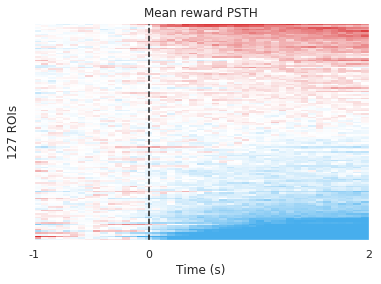

In [96]:
fig, ax = plt.subplots()
pool.plotting.graphfns.axheatmap(fig, ax, rew[order], [], 'dff')
ax.axvline(framerate * start_s * -1, linestyle='--', color='k')
ax.set_xticks([0, framerate * start_s * -1, rew.shape[1]-1])
ax.set_xticklabels([start_s, 0, end_s])
ax.set_xlabel('Time (s)')

ax.set_yticklabels([])
ax.set_ylabel(str(rew.shape[0]) + ' ROIs')

ax.set_title('Mean reward PSTH');

### Shuffle data sanity check

In [97]:
all_shuffle = np.copy(all_rew)
for roi_idx, roi in enumerate(all_rew):
    for trial_idx, trial in enumerate(roi.T):
        all_shuffle[roi_idx, :, trial_idx] = np.roll(trial, np.random.randint(len(trial)))
all_shuffle -= all_shuffle[:, :15, :].mean(1)[:, None, :]
shuffle = all_shuffle.mean(2)        

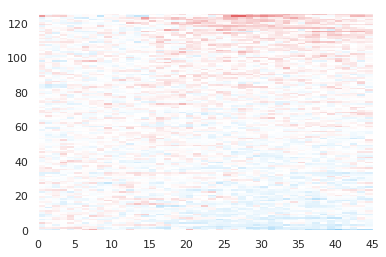

In [99]:
fig, ax = plt.subplots()
shuffle_order = np.argsort(shuffle[:, 15:].mean(1))
pool.plotting.graphfns.axheatmap(fig, ax, shuffle[shuffle_order], [], 'dff')

In [49]:
framerate

15.49